<a href="https://colab.research.google.com/github/sadik-20/091920_repo/blob/master/bitcoinPPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [90]:
df = web.DataReader('BTC-USD', data_source='yahoo', start='2014-01-01', end='2020-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2020-12-14,19305.099609,19012.708984,19144.492188,19246.644531,2.247400e+10,19246.644531
2020-12-15,19525.007812,19079.841797,19246.919922,19417.076172,2.674198e+10,19417.076172
2020-12-16,21458.908203,19298.316406,19418.818359,21310.597656,4.440901e+10,21310.597656


In [63]:
#get the number of rows and columns in the data set
df.shape

(2281, 5)

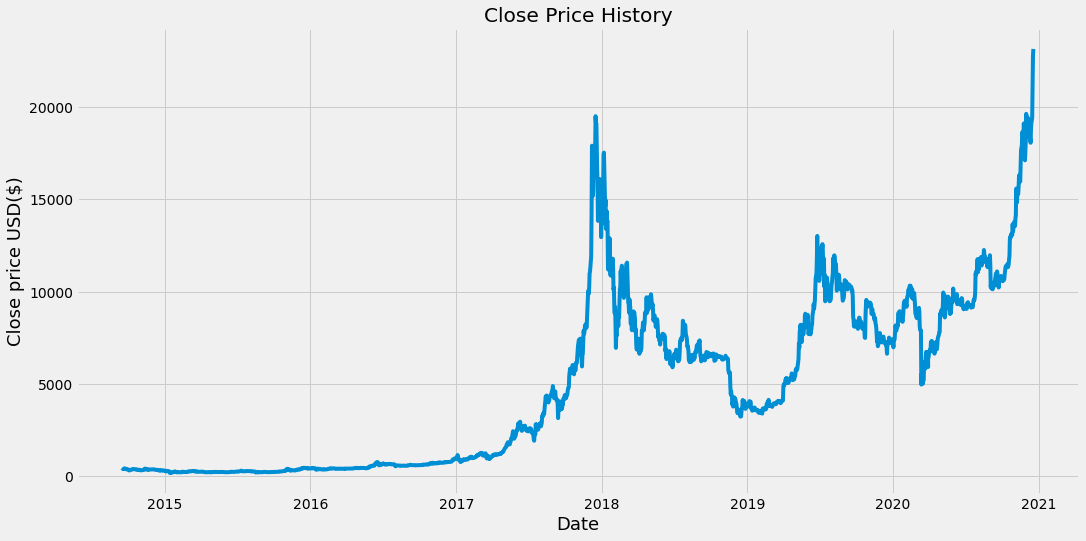

In [64]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title ('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.show()



In [65]:
#Create a new dataframe with only the "Close column"
data = df.filter(['Close'])
# converting to the dataframe to Numpy array
dataset= data.values
#getting the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1825

In [67]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0121617 ],
       [0.01072903],
       [0.00943791],
       ...,
       [0.92041051],
       [0.98550519],
       [1.        ]])

In [68]:
#create training data set
#create scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0121617 , 0.01072903, 0.00943791, 0.01005237, 0.00961321,
       0.00975829, 0.01122341, 0.01067524, 0.01016866, 0.00985729,
       0.00964366, 0.0086707 , 0.00859605, 0.00909592, 0.00895093,
       0.00857884, 0.00790114, 0.00656637, 0.00620243, 0.00661921,
       0.00688523, 0.0076149 , 0.0081413 , 0.00799042, 0.00802252,
       0.00873028, 0.00924705, 0.00970246, 0.00943691, 0.0089048 ,
       0.00895715, 0.00929183, 0.00920925, 0.00891739, 0.00907549,
       0.00893102, 0.00785345, 0.00785031, 0.00736799, 0.00769173,
       0.00761703, 0.00781865, 0.00685928, 0.00728236, 0.00697818,
       0.00643061, 0.00643684, 0.00650923, 0.00663719, 0.00702892,
       0.00745593, 0.00715649, 0.00729033, 0.00806455, 0.00822396,
       0.00825754, 0.01069075, 0.01056766, 0.00956953, 0.00862505])]
[0.009136772197862393]

[array([0.0121617 , 0.01072903, 0.00943791, 0.01005237, 0.00961321,
       0.00975829, 0.01122341, 0.01067524, 0.01016866, 0.00985729,
       0.00964366, 0.0086707 , 0.0

In [69]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [70]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1765, 60, 1)

In [71]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [72]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [73]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1765/1765 [==============================] - 45s 24ms/step - loss: 0.0023


In [74]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [75]:
x_test = np.array(x_test)

In [76]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [83]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [84]:
#getting the root mean squared error(RMSE)
#rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
#rmse = np.sqrt(((predictions - y_test) ** 2).mean())
#rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

559.26171875

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


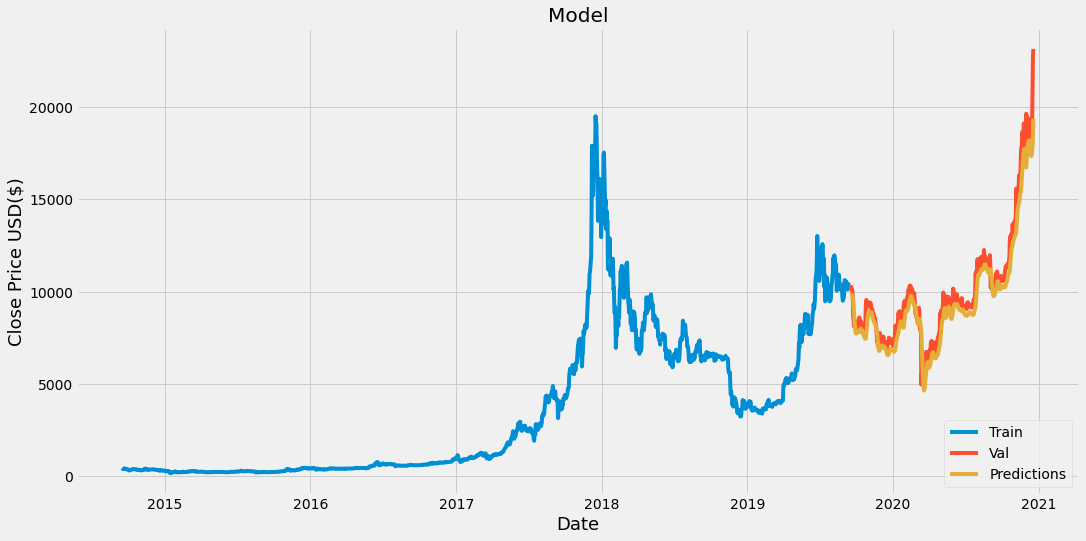

In [87]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [97]:
#Show the actual and predicted prices
valid

,Close,Predictions
Date,,
2019-09-15,10276.793945,9863.092773
2019-09-16,10241.272461,9863.323242
2019-09-17,10198.248047,9853.301758
2019-09-18,10266.415039,9832.633789
2019-09-19,10181.641602,9822.186523
...,...,...
2020-12-14,19246.644531,17465.697266
2020-12-15,19417.076172,17667.626953
2020-12-16,21310.597656,17904.130859


In [99]:
# get the quote from the model
#create a new dataframe
quote_df = df.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = quote_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
# convert the X_test data set to a nump array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[20303.861]]


In [102]:
quote_df2 = web.DataReader('BTC-USD', data_source='yahoo', start='2020-12-18', end='2020-12-18')
print(quote_df2['Close'])


Date
2020-12-18    23137.960938
2020-12-19    23869.832031
Name: Close, dtype: float64
